<a href="https://colab.research.google.com/github/Farahnosh-Yousofi/PyTorch-Tutorials/blob/main/02_Neural_Network_Classification_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# all credits goes to:
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/02_pytorch_classification_video.ipynb

## 02 Neural Network classification with PyTorch



In [1]:
import sklearn

In [2]:

# 1. Data
# Make data

from sklearn.datasets import make_circles

In [3]:
# Make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples, noise= 0.03, random_state=42)

In [4]:
print(f'First 5 samples of X: {X[:5]}')
print(f'First 5 samples of y: {y[:5]}')

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [5]:
# Make dataframe of circle data

import pandas as pd
circles = pd.DataFrame({"X1":  X[:,0],
                        "X2": X[:,1],
                        "labels": y})

In [6]:
circles.head(10)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


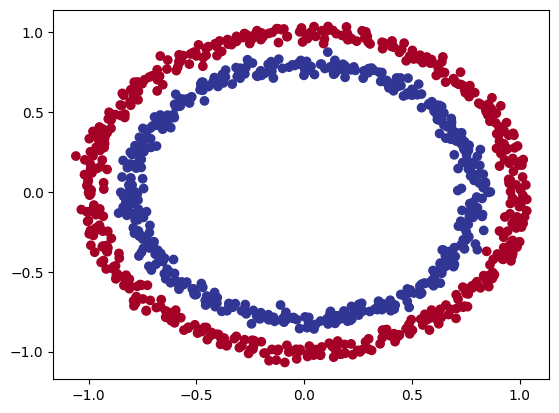

In [7]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x = circles["X1"], y= circles["X2"], c = y, cmap = plt.cm.RdYlBu)

Note: The data that we are working with is often refered to as Toy dataset, a dataset that is small enough to experiment on and still sizeable enough to practice the fundamentals


### 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

### 1.2 Turn data into tensors and create train test split


In [10]:
import torch

In [11]:
type(X), X.dtype, type(y)

(numpy.ndarray, dtype('float64'), numpy.ndarray)

In [12]:
# Turn data into tensor
X = torch.from_numpy(X)

In [13]:
X = X.type(torch.float)

In [14]:
type(X),  X.dtype

(torch.Tensor, torch.float32)

In [15]:
Y = torch.from_numpy(y).type(torch.float)

In [16]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

In [17]:
len(X_train), len(X_test)

(800, 200)

# 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [18]:
## Building a model
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses nn.Module (almost all models in PyTorch subclass nn.Module)
2. Create 2 nn.Linear() layers that are capable of handling the shapes of our data
3. Defines a forward() method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [19]:
# 1. construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shape of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 feature
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  def forward(self, x):
    return self.layer_2(self.layer_2(self.layer_1(x)))  # x --> layer_1 --> layer_2 --> output

# 4. Instatiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)

In [20]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1015,  0.6873],
                      [-0.5495,  0.4018],
                      [ 0.4969, -0.6380],
                      [ 0.1596,  0.6781],
                      [ 0.1861,  0.4410]])),
             ('0.bias', tensor([ 0.4834, -0.6933, -0.5654, -0.6264,  0.4683])),
             ('1.weight',
              tensor([[ 0.0529, -0.4104,  0.2127,  0.2752,  0.1112]])),
             ('1.bias', tensor([0.0067]))])

In [23]:
# make predictions
with torch.inference_mode():
  untrained_predict = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_predict)}, shape: {untrained_predict.shape}")
print(f'length of test samples:{len(X_test)}, shape: {X_test.shape}')
print(f"\nFirst 10 predictions:\n{torch.round(untrained_predict[:10])}")
print(f"\nFirst 10 labels:\n{Y_test[:10]}")


Length of predictions: 200, shape: torch.Size([200, 1])
length of test samples:200, shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how wrong your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

1. For some common choices of loss functions and optimizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer
2. For the loss function we're going to use torch.nn.BECWithLogitsLoss(), for more on what binary cross entropy (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
3. For a defintion on what a logit is in deep learning - https://stackoverflow.com/a/52111173/7900723
4. For different optimizers see torch.optim

In [24]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss  = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # Has sigmoid function build_in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

In [25]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true,y_predicted):
  correct = torch.eq(y_true, y_predicted).sum().item()
  accuracy = (correct/len(y_predicted))*100
  return accuracy

In [26]:
accuracy_fn(Y_test.to(device), untrained_predict.to(device))

0.0

## 3. Train Model
To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

## 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.



# model.eval()
is a method in PyTorch that sets the model to evaluation mode. This is particularly important when using layers like Dropout and Batch Normalization, which behave differently during training and inference.

Key Effects of model.eval()
1. Disables Dropout: Dropout randomly zeroes out units during training to prevent overfitting. In evaluation mode, all units are kept active.
2. Fixes Batch Normalization Statistics: During training, BatchNorm layers compute mean and variance from the current batch. In evaluation mode, they use the running mean and variance instead.

#### When to Use It?
Before making predictions on test data.
Before validating the model on a validation dataset.

To resume training, use model.train().
model.eval() does not turn off gradient computation. To save memory during inference, wrap it with torch.no_grad().

In [27]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0898],
        [ 0.0548],
        [-0.1892],
        [-0.0628],
        [ 0.2547]])

In [28]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4776],
        [0.5137],
        [0.4529],
        [0.4843],
        [0.5633]])

For our prediction probability values, we need to perform a range-style rounding on them:



*   `Ly_pred_probs` >= 0.5, `y=1 `(class 1)
*   `y_pred_probs` < 0.5, `y=0 `(class 0)

In [29]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 1., 0., 0., 1.])

# 3.2 Building training and testing loop

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put data to target device
X_train, X_test = X_train.to(device), X_test.to(device)
Y_train, Y_test = Y_train .to(device) ,Y_test.to(device)

# build training and evaluation loop
model_0.train()
for epoch in range(epochs):
  # forward pass
  Y_logits = model_0(X_train).squeeze()

  Y_pred = torch.round(torch.sigmoid(Y_logits)) # turn logit -> pred probs -> pred labels

  # calculate loss/ accuracy
  # loss = loss_fn(torch.sigmoid(Y_logits), # nn.BCELoss expects  pred probabilities as input, Y_train)

  loss = loss_fn(Y_logits, Y_train) # nn.BCEWithLogitLoss expects raw logits as input

  acc = accuracy_fn(y_true = Y_train, y_predicted = Y_pred)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backward (Backpropagation)
  loss.backward()

  # 5. Optimizer step (Gradient Descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Loss
    test_loss = loss_fn(test_logits, Y_test)
    test_acc = accuracy_fn(y_true=Y_test, y_predicted=test_pred)

  # Print out what is happenin

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.70099, Acc: 50.75% | Test loss: 0.70464, Test acc: 49.50%
Epoch: 10 | Loss: 0.69894, Acc: 50.50% | Test loss: 0.70315, Test acc: 50.00%
Epoch: 20 | Loss: 0.69774, Acc: 50.38% | Test loss: 0.70229, Test acc: 48.00%
Epoch: 30 | Loss: 0.69691, Acc: 50.25% | Test loss: 0.70168, Test acc: 48.00%
Epoch: 40 | Loss: 0.69630, Acc: 51.12% | Test loss: 0.70121, Test acc: 49.50%
Epoch: 50 | Loss: 0.69583, Acc: 50.88% | Test loss: 0.70081, Test acc: 48.50%
Epoch: 60 | Loss: 0.69546, Acc: 50.50% | Test loss: 0.70046, Test acc: 48.50%
Epoch: 70 | Loss: 0.69516, Acc: 50.38% | Test loss: 0.70015, Test acc: 49.50%
Epoch: 80 | Loss: 0.69491, Acc: 50.00% | Test loss: 0.69986, Test acc: 49.00%
Epoch: 90 | Loss: 0.69470, Acc: 50.25% | Test loss: 0.69960, Test acc: 48.00%
Epoch: 100 | Loss: 0.69452, Acc: 50.38% | Test loss: 0.69935, Test acc: 48.00%
Epoch: 110 | Loss: 0.69437, Acc: 50.62% | Test loss: 0.69912, Test acc: 48.00%
Epoch: 120 | Loss: 0.69423, Acc: 50.62% | Test loss: 0.69890, T

## 4. Make predictions and evaluate the model

From the metrics it looks like our model is random guessing.

How could we investigate this further?

"Visualize!"

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) from the [Learn PyTorch for Deep Learning repo](https://github.com/mrdbourke/pytorch-deep-learning).

It contains a helpful function called `plot_decision_boundary()` which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import `plot_predictions()` which we wrote in notebook 01 to use later.

In [31]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo if it is not already downloaded

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists.")
else:
  print("Downloading helper function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

### plt.subplot(1, 2, 1):
- 1 → Number of rows in the subplot grid (1 row).
- 2 → Number of columns in the subplot grid (2 columns).
- 1 → Index of the subplot (this selects the first subplot).


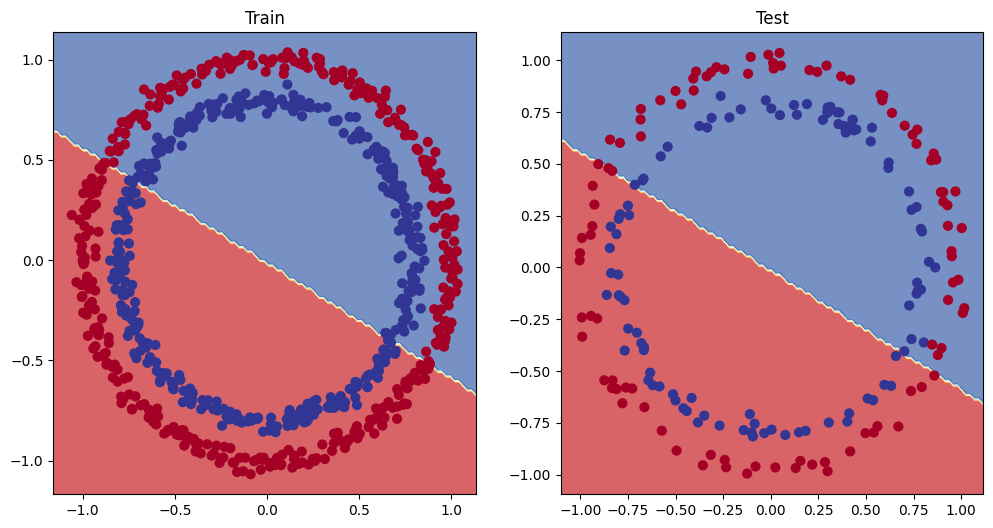

In [32]:
# Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, Y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [33]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z   ## or return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# create the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

# Writing training and evaluation loop for model_1

In [35]:
from io import open_code
# Creating the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, X_test = X_train.to(device), X_test.to(device)
Y_test, Y_train = Y_test.to(device), Y_train.to(device)

epochs = 1000

for epoch in range(epochs):
  # Train
  model_1.train()

  logits = model_1(X_train).squeeze()
  preds = torch.round(torch.sigmoid(logits))

  loss = loss_fn(logits, Y_train)
  acc = accuracy_fn(Y_train, preds)

  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        Y_test)
    test_acc = accuracy_fn(y_true=Y_test,
                           y_predicted=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


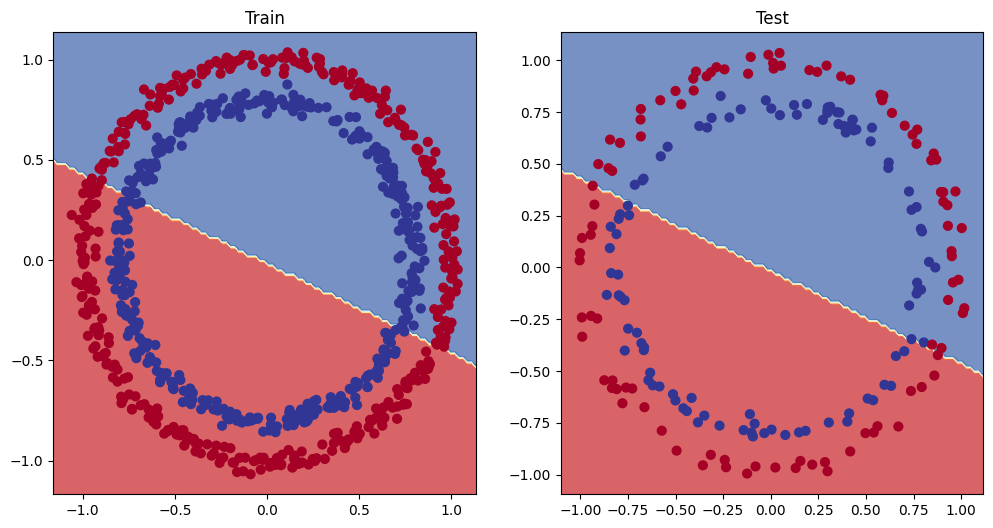

In [36]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, Y_test)

## Testing our model that whether it works with linear datasets or fit a straight line


In [37]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [38]:
X1_Train, X1_test,Y1_Train,  Y1_test = train_test_split(X,y,test_size=0.2,random_state=42)

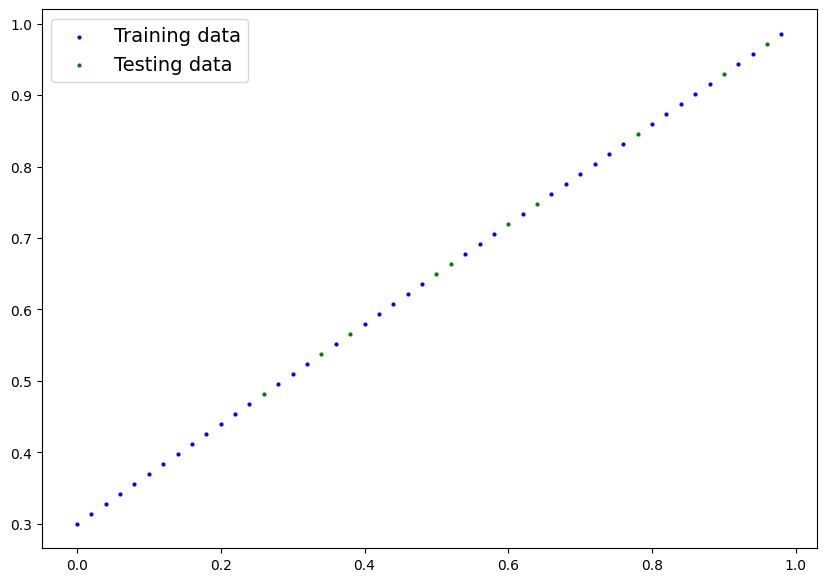

In [39]:
plot_predictions(train_data=X1_Train,
                 train_labels=Y1_Train,
                 test_data=X1_test,
                 test_labels=Y1_test);

In [40]:
X1_Train, Y1_Train, X1_test, Y1_test = X1_Train.to(device), Y1_Train.to(device), X1_test.to(device), Y1_test.to(device)

In [41]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 1, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z   ## or return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
logit = model_2(X1_test).squeeze()
logit

tensor([-0.2255, -0.0633, -0.1194, -0.0259, -0.2005, -0.0072, -0.1444, -0.1506,
        -0.1070, -0.1880], grad_fn=<SqueezeBackward0>)

In [43]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [44]:
from io import open_code
# Creating the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)



epochs = 1000

for epoch in range(epochs):
  # Train
  model_2.train()

  preds = model_2(X1_Train)


  loss = loss_fn(preds, Y1_Train)


  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_preds = model_2(X1_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds,
                        Y1_test)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.78723 | Test loss: 0.79374
Epoch: 100 | Loss: 0.00704 | Test loss: 0.03604
Epoch: 200 | Loss: 0.01146 | Test loss: 0.03115
Epoch: 300 | Loss: 0.01311 | Test loss: 0.02927
Epoch: 400 | Loss: 0.01482 | Test loss: 0.02696
Epoch: 500 | Loss: 0.01381 | Test loss: 0.02693
Epoch: 600 | Loss: 0.01406 | Test loss: 0.02573
Epoch: 700 | Loss: 0.01336 | Test loss: 0.02343
Epoch: 800 | Loss: 0.01335 | Test loss: 0.02490
Epoch: 900 | Loss: 0.01323 | Test loss: 0.02421


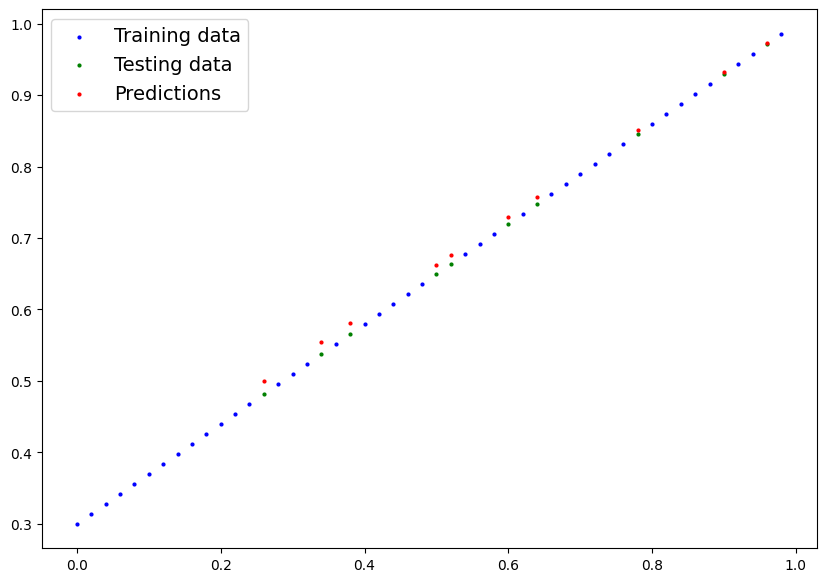

In [45]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X1_test)

# Plot data and predictions
plot_predictions(train_data=X1_Train.cpu(),
                 train_labels=Y1_Train.cpu(),
                 test_data=X1_test.cpu(),
                 test_labels=Y1_test.cpu(),
                 predictions=y_preds.cpu());

In [46]:
# Same architecture as model_1 (but using nn.Sequential())
model_3 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

In [48]:
X1_Train, X1_test,Y1_Train,  Y1_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
X1_Train, Y1_Train, X1_test, Y1_test = X1_Train.to(device), Y1_Train.to(device), X1_test.to(device), Y1_test.to(device)

In [50]:
from io import open_code
# Creating the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)



epochs = 1000

for epoch in range(epochs):
  # Train
  model_3.train()

  preds = model_3(X1_Train)


  loss = loss_fn(preds, Y1_Train)


  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_preds = model_3(X1_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds,
                        Y1_test)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.78723 | Test loss: 0.79374
Epoch: 100 | Loss: 0.00704 | Test loss: 0.03604
Epoch: 200 | Loss: 0.01146 | Test loss: 0.03115
Epoch: 300 | Loss: 0.01311 | Test loss: 0.02927
Epoch: 400 | Loss: 0.01482 | Test loss: 0.02696
Epoch: 500 | Loss: 0.01381 | Test loss: 0.02693
Epoch: 600 | Loss: 0.01406 | Test loss: 0.02573
Epoch: 700 | Loss: 0.01336 | Test loss: 0.02343
Epoch: 800 | Loss: 0.01335 | Test loss: 0.02490
Epoch: 900 | Loss: 0.01323 | Test loss: 0.02421


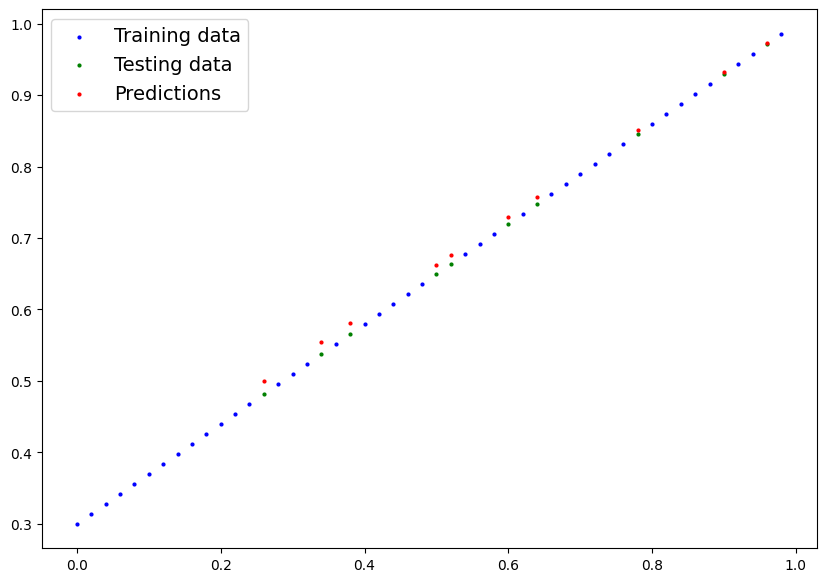

In [51]:
# Turn on evaluation mode
model_3.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_3(X1_test)

# Plot data and predictions
plot_predictions(train_data=X1_Train.cpu(),
                 train_labels=Y1_Train.cpu(),
                 test_data=X1_test.cpu(),
                 test_labels=Y1_test.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X,Y = make_circles(n_samples=1000, noise=0.02, random_state=42)

In [53]:
X[:5], Y[:5]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737]]),
 array([1, 1, 1, 1, 0]))

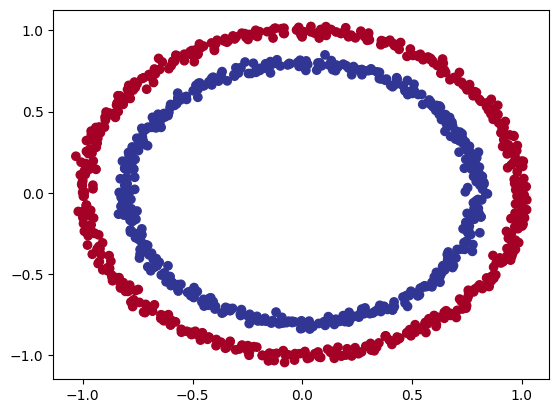

In [54]:
plt.scatter(
    X[:,0],X[:,1], c=Y, cmap=plt.cm.RdYlBu)

In [55]:
import torch
from sklearn.model_selection import train_test_split


# Converting data from numpy to torch tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(Y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]


(tensor([[ 0.6483, -0.4748],
         [ 0.6464, -0.7356],
         [-1.0020, -0.1328],
         [-0.9692, -0.2252],
         [-0.1676,  0.7936]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [56]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [57]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### 6.3 Training a model with non-linearity

In [58]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 10000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_predicted=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_predicted=test_pred)

  # Print out what's this happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6931, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.75% | Test Loss: 0.6909, Test Acc: 53.00%
Epoch: 200 | Loss: 0.6898, Acc: 53.00% | Test Loss: 0.6892, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6880, Acc: 53.00% | Test Loss: 0.6870, Test Acc: 56.50%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6837, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6811, Acc: 52.62% | Test Loss: 0.6788, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6752, Acc: 53.87% | Test Loss: 0.6719, Test Acc: 56.50%
Epoch: 700 | Loss: 0.6665, Acc: 57.75% | Test Loss: 0.6617, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6515, Acc: 63.62% | Test Loss: 0.6455, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6233, Acc: 74.25% | Test Loss: 0.6185, Test Acc: 77.50%
Epoch: 1000 | Loss: 0.5673, Acc: 88.25% | Test Loss: 0.5682, Test Acc: 89.00%
Epoch: 1100 | Loss: 0.4781, Acc: 95.62% | Test Loss: 0.4887, Test Acc: 92.50%
Epoch: 1200 | Loss: 0.3623, Acc: 98.50% | Test Loss: 0.3854, Test Acc: 96.50

### 6.4 Evaluating a model trained with non-linear activation functions

In [59]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

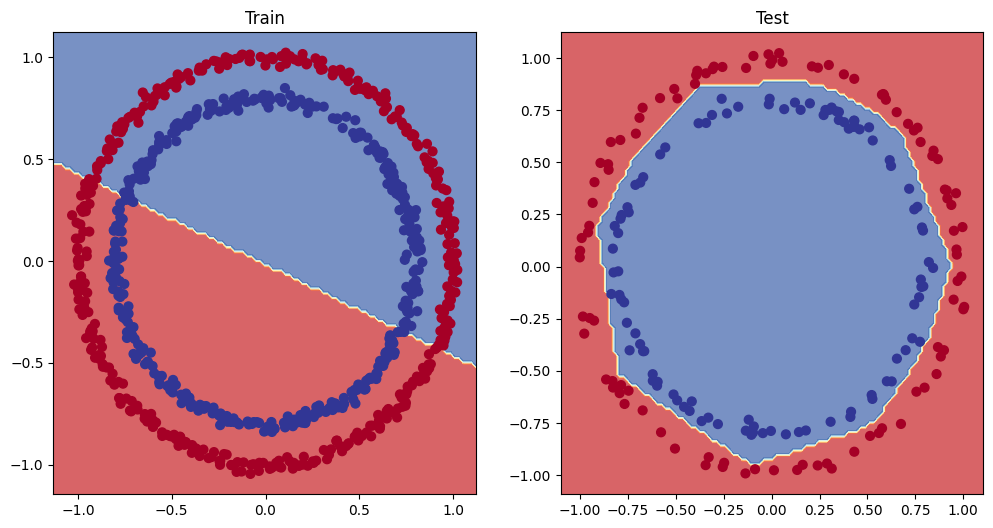

In [60]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

**Challenge:** Can you improve model_3 to do better than 80% accuracy on the test data?

By increasing the number of epochs we could get accuracy better than 80%

In [61]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=20)
    self.layer_3 = nn.Linear(in_features=20, out_features=50)
    self.layer_4 = nn.Linear(in_features=50, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function


  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_4 = CircleModelV2().to(device)
model_4

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=50, bias=True)
  (layer_4): Linear(in_features=50, out_features=1, bias=True)
  (relu): ReLU()
)

In [62]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)

In [63]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_predicted=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_predicted=test_pred)

  # Print out what's this happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6935, Acc: 50.00% | Test Loss: 0.6939, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6920, Acc: 64.75% | Test Loss: 0.6923, Test Acc: 61.00%
Epoch: 200 | Loss: 0.6907, Acc: 62.25% | Test Loss: 0.6909, Test Acc: 59.00%
Epoch: 300 | Loss: 0.6892, Acc: 56.88% | Test Loss: 0.6892, Test Acc: 57.50%
Epoch: 400 | Loss: 0.6872, Acc: 56.12% | Test Loss: 0.6868, Test Acc: 55.00%
Epoch: 500 | Loss: 0.6841, Acc: 56.00% | Test Loss: 0.6833, Test Acc: 55.00%
Epoch: 600 | Loss: 0.6791, Acc: 56.00% | Test Loss: 0.6777, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6710, Acc: 56.25% | Test Loss: 0.6688, Test Acc: 56.50%
Epoch: 800 | Loss: 0.6568, Acc: 64.25% | Test Loss: 0.6541, Test Acc: 65.00%
Epoch: 900 | Loss: 0.6298, Acc: 71.50% | Test Loss: 0.6266, Test Acc: 69.00%


## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

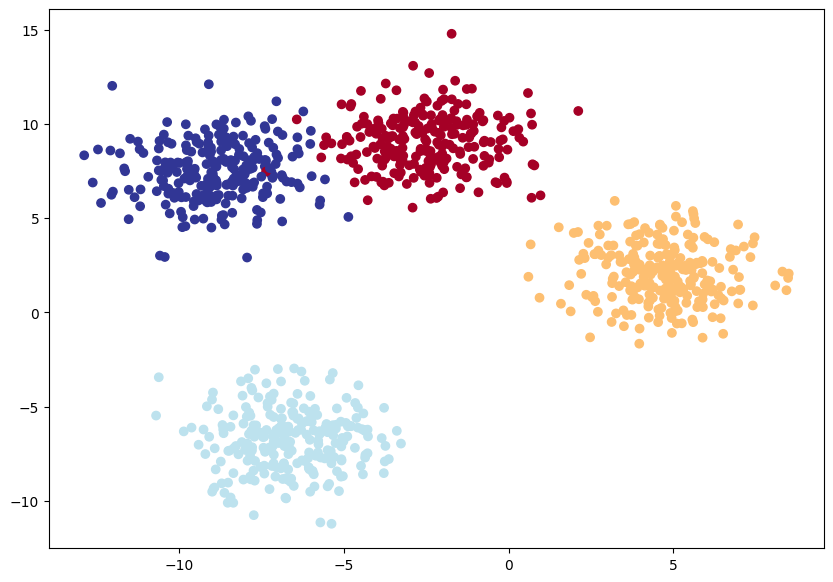

In [64]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in PyTorch

In [65]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [66]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_5 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_5

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [69]:
# Create a loss function for multi-class classification - loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1) # learning rate is a hyperparameter you can change

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logtis) to predicition probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [70]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_5.train()

  y_logits = model_5(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_predicted=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_predicted=test_preds)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.0432, Acc: 65.50% | Test loss: 0.5786, Test acc: 95.50%
Epoch: 10 | Loss: 0.1440, Acc: 99.12% | Test loss: 0.1304, Test acc: 99.00%
Epoch: 20 | Loss: 0.0806, Acc: 99.12% | Test loss: 0.0722, Test acc: 99.50%
Epoch: 30 | Loss: 0.0592, Acc: 99.12% | Test loss: 0.0513, Test acc: 99.50%
Epoch: 40 | Loss: 0.0489, Acc: 99.00% | Test loss: 0.0410, Test acc: 99.50%
Epoch: 50 | Loss: 0.0429, Acc: 99.00% | Test loss: 0.0349, Test acc: 99.50%
Epoch: 60 | Loss: 0.0391, Acc: 99.00% | Test loss: 0.0308, Test acc: 99.50%
Epoch: 70 | Loss: 0.0364, Acc: 99.00% | Test loss: 0.0280, Test acc: 99.50%
Epoch: 80 | Loss: 0.0345, Acc: 99.00% | Test loss: 0.0259, Test acc: 99.50%
Epoch: 90 | Loss: 0.0330, Acc: 99.12% | Test loss: 0.0242, Test acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model


In [75]:
# Make predictions
model_5.eval()
with torch.inference_mode():
  y_logits = model_5(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [76]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4287e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0767e-09, 2.0006e-04]])

In [77]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

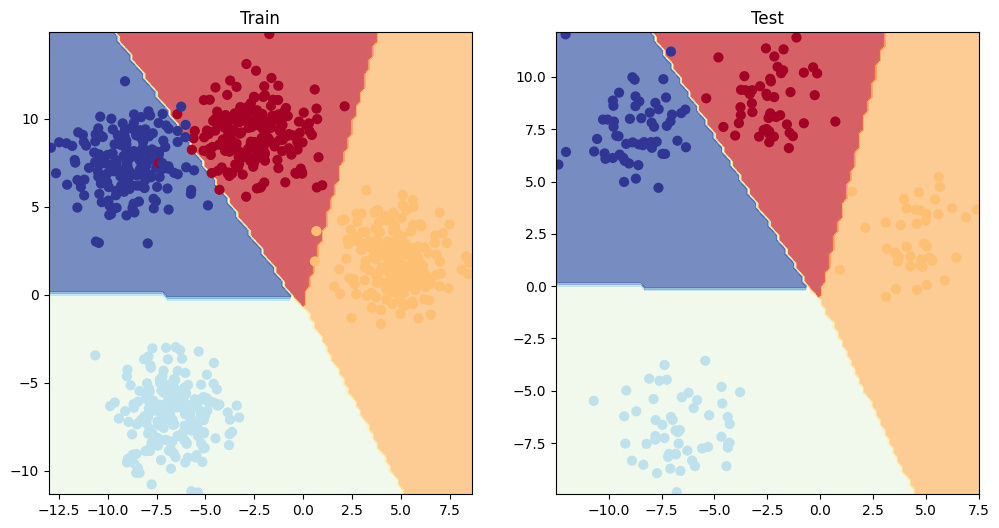

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/latest/

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 864.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy().to(device)

# Calculuate accuracy
torchmetric_accuracy(y_preds, y_blob_test)